# Text Analysis

- **Sentiment Analysis**
    - tokenization
    - stop words
    - stemming
- **TF-IDF**
    - Bag of Words
    - term frequency
    - inverse document frequency
- Tools: `nltk`

In [2]:
# pandas and matplotlib setup
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk

#### Reminder: **Natural Language Processing** is a whole field of study.

Like most topics in this course, there are many courses solely focused on the appropriate analysis of text. We'll cover the general concepts in this course, but know you're missing lots of important details.

## Natural Language Toolkit (`nltk`)

For more details on using the functionality within this package, check out the [NLTK Book](http://www.nltk.org/book/).

0. Preface
1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
4. Writing Structured Programs
5. Categorizing and Tagging Words 
6. Learning to Classify Text
7. Extracting Information from Text
8. Analyzing Sentence Structure
9. Building Feature Based Grammars
10. Analyzing the Meaning of Sentences 
11. Managing Linguistic Data
12. Afterword: Facing the Language Challenge

[VADER](https://github.com/cjhutto/vaderSentiment) is a particularly helpful tool/lexicon when working with sentiments expressed in social media (tweets, online reviews, etc.)

Its functionality is available through `nltk`, so we'll download the vader lexicon for use later in this notebook.

In [3]:
# get lexicon we'll be working with today
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shannonellis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## The Data

In [4]:
# read in feedback dataset
df_sp19 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Sp19.csv')
df_sp19.head(6)

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments"
1,I enjoy learning how to use pandas through the...,NaN,somewhat easier,about the same,attend occasionally,"Assignments, Group Project"
2,No attendance,NaN,about as difficult,about the same,attend occasionally,"Assignments, Piazza"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza"
5,NaN,NaN,about as difficult,about the same,attend occasionally,"Lecture, Section - Workbooks, Assignments, Gro..."


In [5]:
# read in feedback dataset
df_wi20 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Wi20.csv')
df_wi20.head(6)

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,a2,a3
0,Guest Lectures,NaN,about as difficult,about the same,1.0,2.0,4.0
1,"Guest speakers, they were very interesting and...",Nothing,somewhat easier,about the same,1.0,2.0,3.0
2,NaN,NaN,somewhat easier,somewhat less,3.0,3.0,4.0
3,NaN,NaN,somewhat easier,somewhat less,0.5,1.0,1.5
4,The discussion is clear and TA is nice.,Some grading for assignments requires regrade ...,way easier,way less,0.5,0.5,0.5
5,Group collaboration,Not much programming direction,about as difficult,about the same,3.0,4.0,8.0


## Describe & Explore

We'll quickly describe and explore the data to see what information we have before moving on to Text Analysis.

### Data Considerations

- duplicate responses?
- PIDs for individuals in the class (typos?)
- missingness?
- reflect reality?

In [6]:
# information about rows and columns
print(df_sp19.shape, df_wi20.shape)

(384, 6) (295, 7)


Note: There were 826 students enrolled in COGS108 during Spring 2019. So, we're looking at the opinions of less than half of the students in this class.

There are 444 students this Winter 2020 quarter. So, we have ~75% of students responding.

### Missingness

In [7]:
# how many nonresponses
df_sp19.isnull().sum()

enjoyed_most          58
enjoyed_least         78
difficulty             0
time_spent             0
section_attendance     8
helpful_materials      0
dtype: int64

In [8]:
# how many nonresponses
df_wi20.isnull().sum()

enjoyed_most     33
enjoyed_least    64
difficulty        0
time_spent        0
a1                0
a2                0
a3                0
dtype: int64

We see that there are more nonresponses in the `enjoyed_least` category than the `enjoyed_most` category. So, more people left what they enjoyed least blank than they did what they enjoyed most.

#### Winter 2020

Let's look at those people a bit closer...

In [9]:
# number of people who didn't respond to either
df_sp19[df_sp19['enjoyed_most'].isnull() & df_sp19['enjoyed_least'].isnull()].shape

(50, 6)

This means that there are only 8 people who mentioned what they like least but didn't have a most in Spring 2019. We may consider these people's responses to be of high importance. This suggests they're liking COGS108 less than others...

In [10]:
# number of people who didn't respond to either
check_least = df_sp19[df_sp19['enjoyed_most'].isnull() & df_sp19['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['assigned groups because I was looking forward to working with my friends',
 'Coding....',
 'The professor focus too much on statistics and spend insufficient time in coding',
 'What I have liked the least of COGS108 is that I have had trouble with the assignments since I came in with a matlab background and not a python background. So basically not knowing the language has been tough. ',
 'Assigned groups. I enrolled in the class with a group of friends under the assumption that we’d get to work together as in previous iterations of the course.',
 'The professor talked a bit fast',
 "I think lectures are not organized and they are extremely confusing. It would help if they were catered in a more content / topic based way. The homeworks are extremely difficult if you don't have python experience ",
 'Not being able to work with friends on the group project. Trying to work with chosen groupmates who do not care about this class.']

#### Winter 2020

And from 2020...only two people, so let's see what they had to say

In [11]:
# number of people who didn't respond to either
df_wi20[df_wi20['enjoyed_most'].isnull() & df_wi20['enjoyed_least'].isnull()].shape

(31, 7)

In [12]:
# number of people who didn't respond to either
check_least = df_wi20[df_wi20['enjoyed_most'].isnull() & df_wi20['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['Seems to include a lot of important topics in data science, but only goes very briefly in every single one of them. Might be the purpose so that students are made aware of the basic concepts of such topics in data science and expected to learn deeper concepts in other concentrated classes. ',
 'I think the tests and the hidden tests from assignments are not exhaustive.']

Missing data causes a problem in `nltk`, so we either get rid of individuals who didn't respond to both, or we can replace their missing data with 'No response', knowing that this text will be included in the analysis now.

In [13]:
# fill NAs with string 'No response'
df_sp19['enjoyed_most'] = df_sp19['enjoyed_most'].fillna('No response')
df_sp19['enjoyed_least'] = df_sp19['enjoyed_least'].fillna('No response')
df_sp19.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments"
1,I enjoy learning how to use pandas through the...,No response,somewhat easier,about the same,attend occasionally,"Assignments, Group Project"
2,No attendance,No response,about as difficult,about the same,attend occasionally,"Assignments, Piazza"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza"


In [14]:
df_wi20['enjoyed_most'] = df_wi20['enjoyed_most'].fillna('No response')
df_wi20['enjoyed_least'] = df_wi20['enjoyed_least'].fillna('No response')
df_wi20.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,a2,a3
0,Guest Lectures,No response,about as difficult,about the same,1.0,2.0,4.0
1,"Guest speakers, they were very interesting and...",Nothing,somewhat easier,about the same,1.0,2.0,3.0
2,No response,No response,somewhat easier,somewhat less,3.0,3.0,4.0
3,No response,No response,somewhat easier,somewhat less,0.5,1.0,1.5
4,The discussion is clear and TA is nice.,Some grading for assignments requires regrade ...,way easier,way less,0.5,0.5,0.5


### Exploratory Plots

These can give us a quick idea of students' thoughts on the course.

- Relative Difficulty
- Time Spent
- Section Attendance

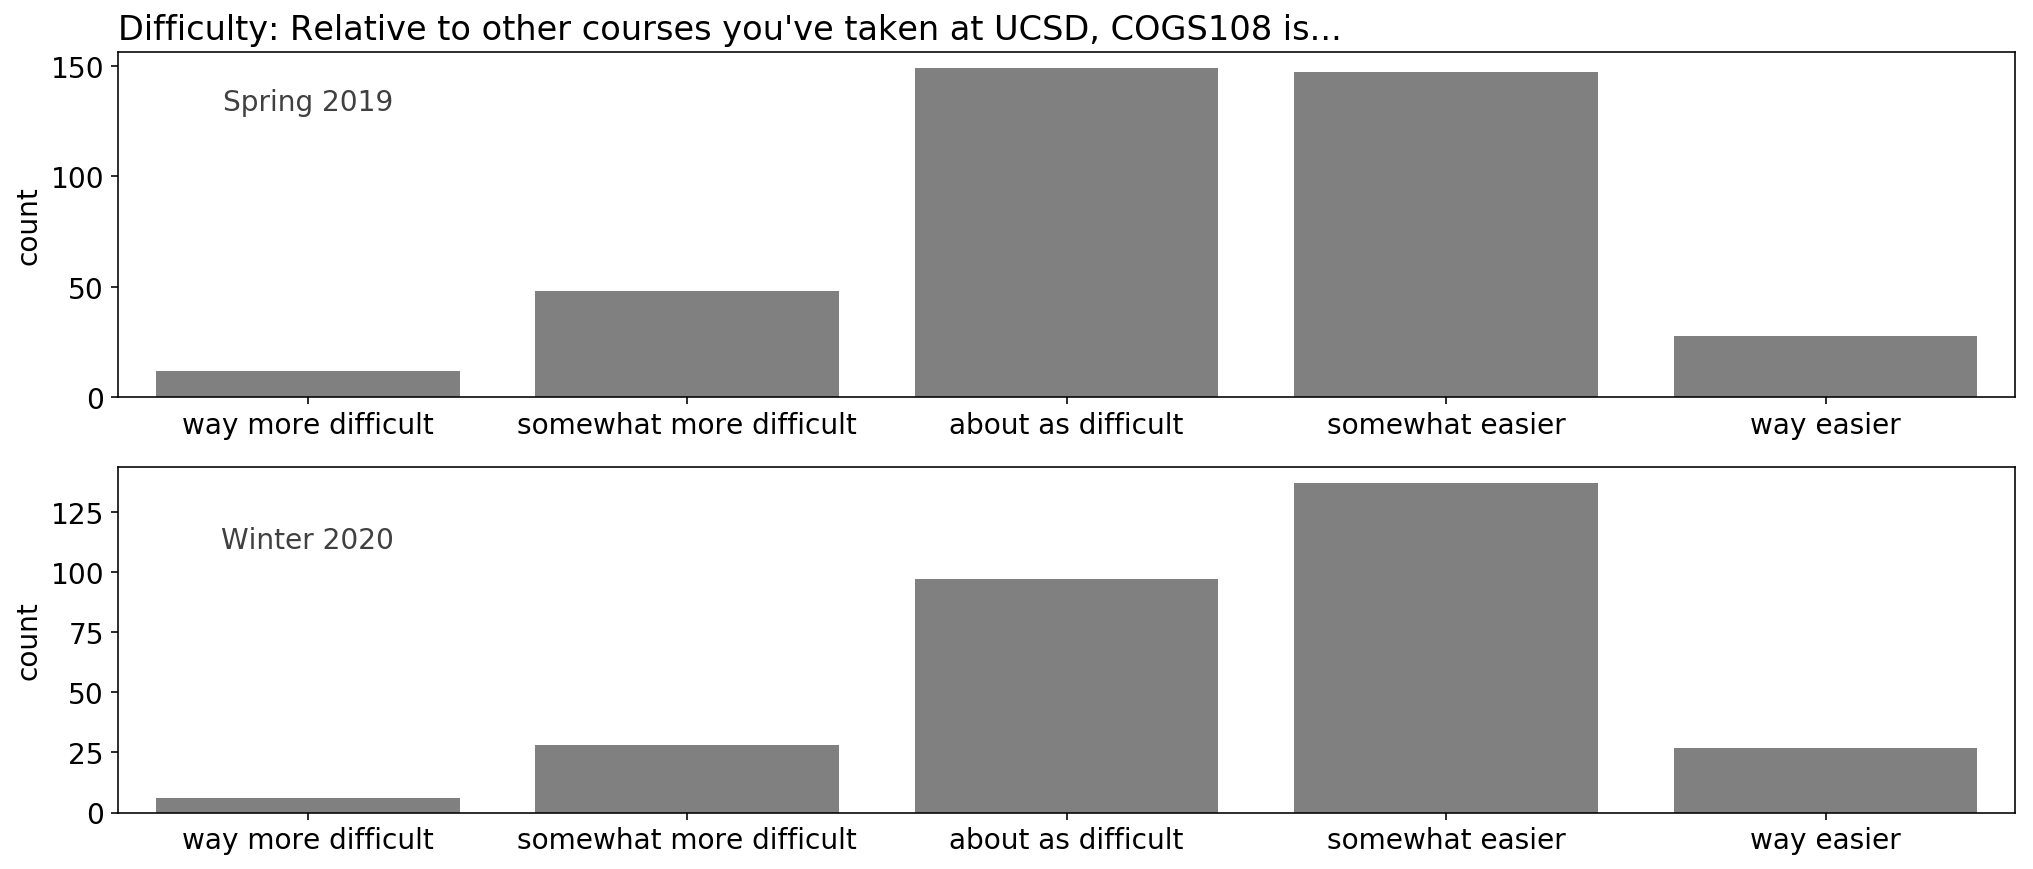

In [15]:
plt.subplot(2, 1, 1)
ax = sns.countplot(df_sp19['difficulty'],
             order=['way more difficult','somewhat more difficult','about as difficult',
                    'somewhat easier','way easier'],
             color = 'gray')
plt.title('Difficulty: Relative to other courses you\'ve taken at UCSD, COGS108 is...', loc='left')
plt.xlabel('')
ax.text(x=0, y=130, s='Spring 2019', fontsize=14, alpha=0.75, ha='center')

plt.subplot(2, 1, 2)
ax = sns.countplot(df_wi20['difficulty'],
             order=['way more difficult','somewhat more difficult','about as difficult',
                    'somewhat easier','way easier'],
             color = 'gray')
ax.text(x=0, y=110, s='Winter 2020', fontsize=14, alpha=0.75, ha='center')
plt.xlabel('');


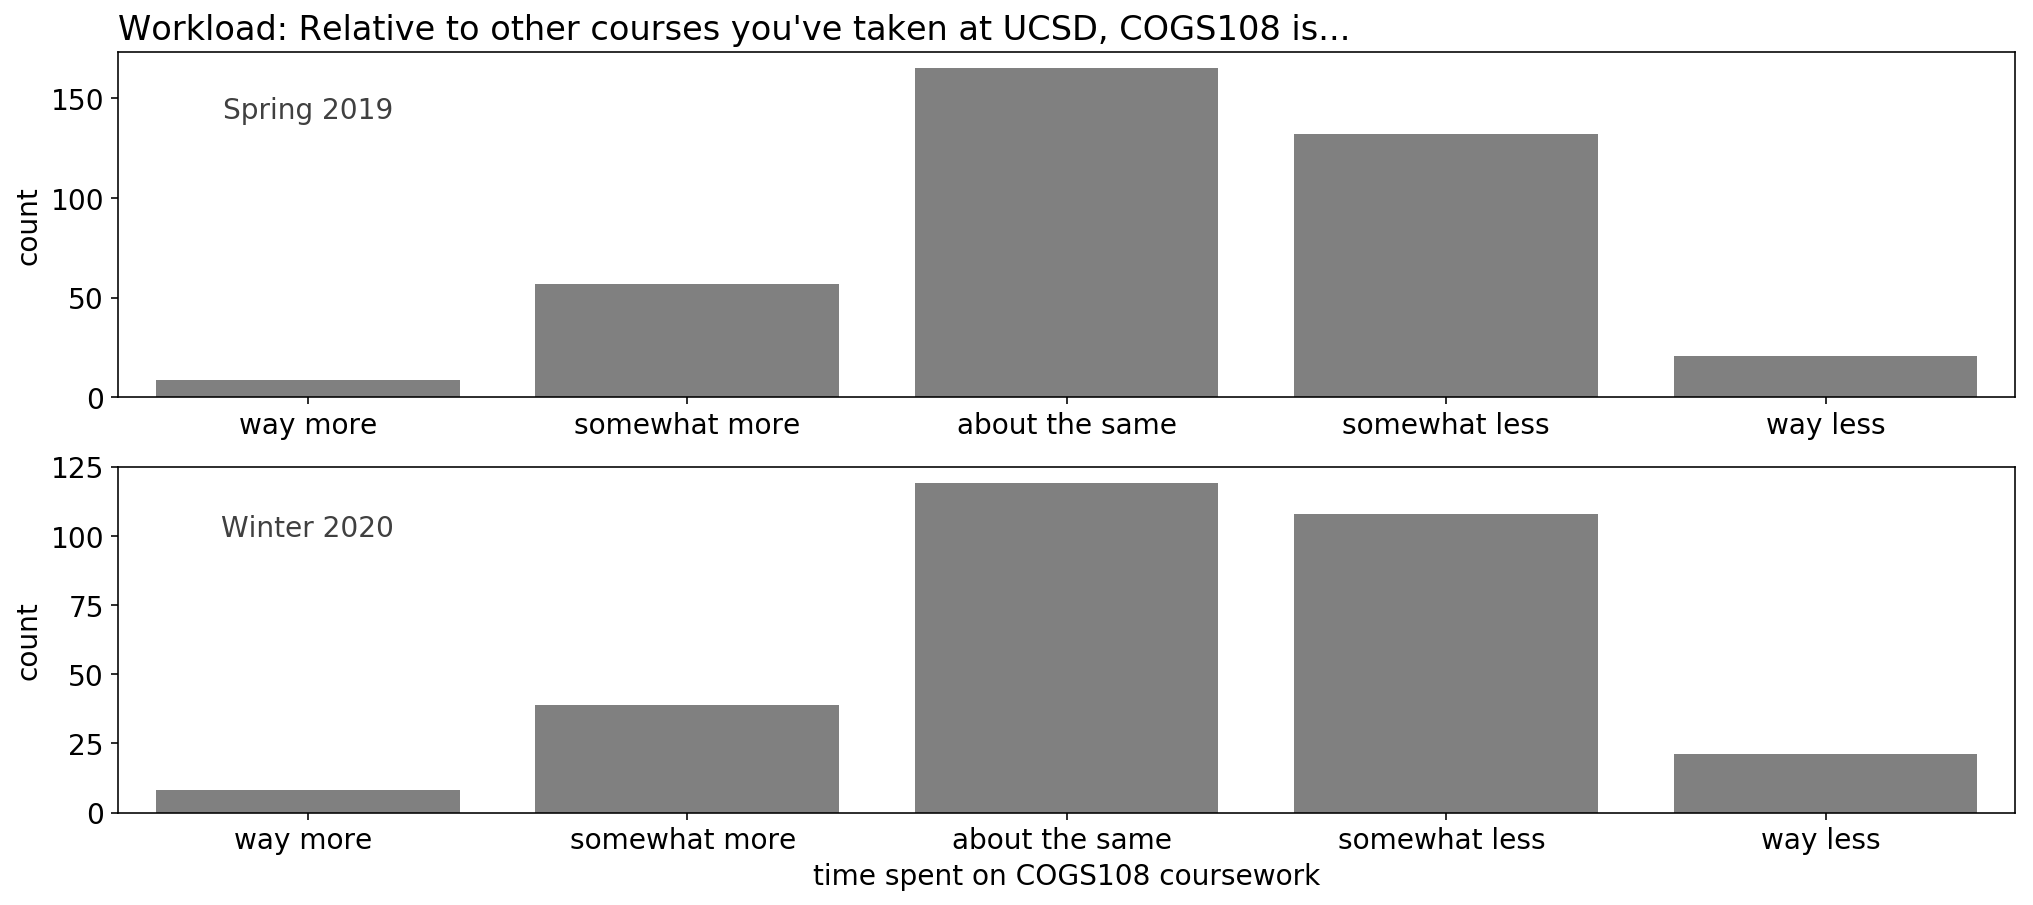

In [16]:
plt.subplot(2, 1, 1)
ax = sns.countplot(df_sp19['time_spent'],
             order=['way more','somewhat more','about the same',
                    'somewhat less','way less'],
             color = 'gray')
plt.title('Workload: Relative to other courses you\'ve taken at UCSD, COGS108 is...', loc='left')
plt.xlabel('')
ax.text(x=0, y=140, s='Spring 2019', fontsize=14, alpha=0.75, ha='center')

plt.subplot(2, 1, 2)
ax = sns.countplot(df_wi20['time_spent'],
             order=['way more ','somewhat more ','about the same ',
                    'somewhat less ','way less '],
             color = 'gray')
ax.text(x=0, y=100, s='Winter 2020', fontsize=14, alpha=0.75, ha='center')
plt.xlabel('time spent on COGS108 coursework');

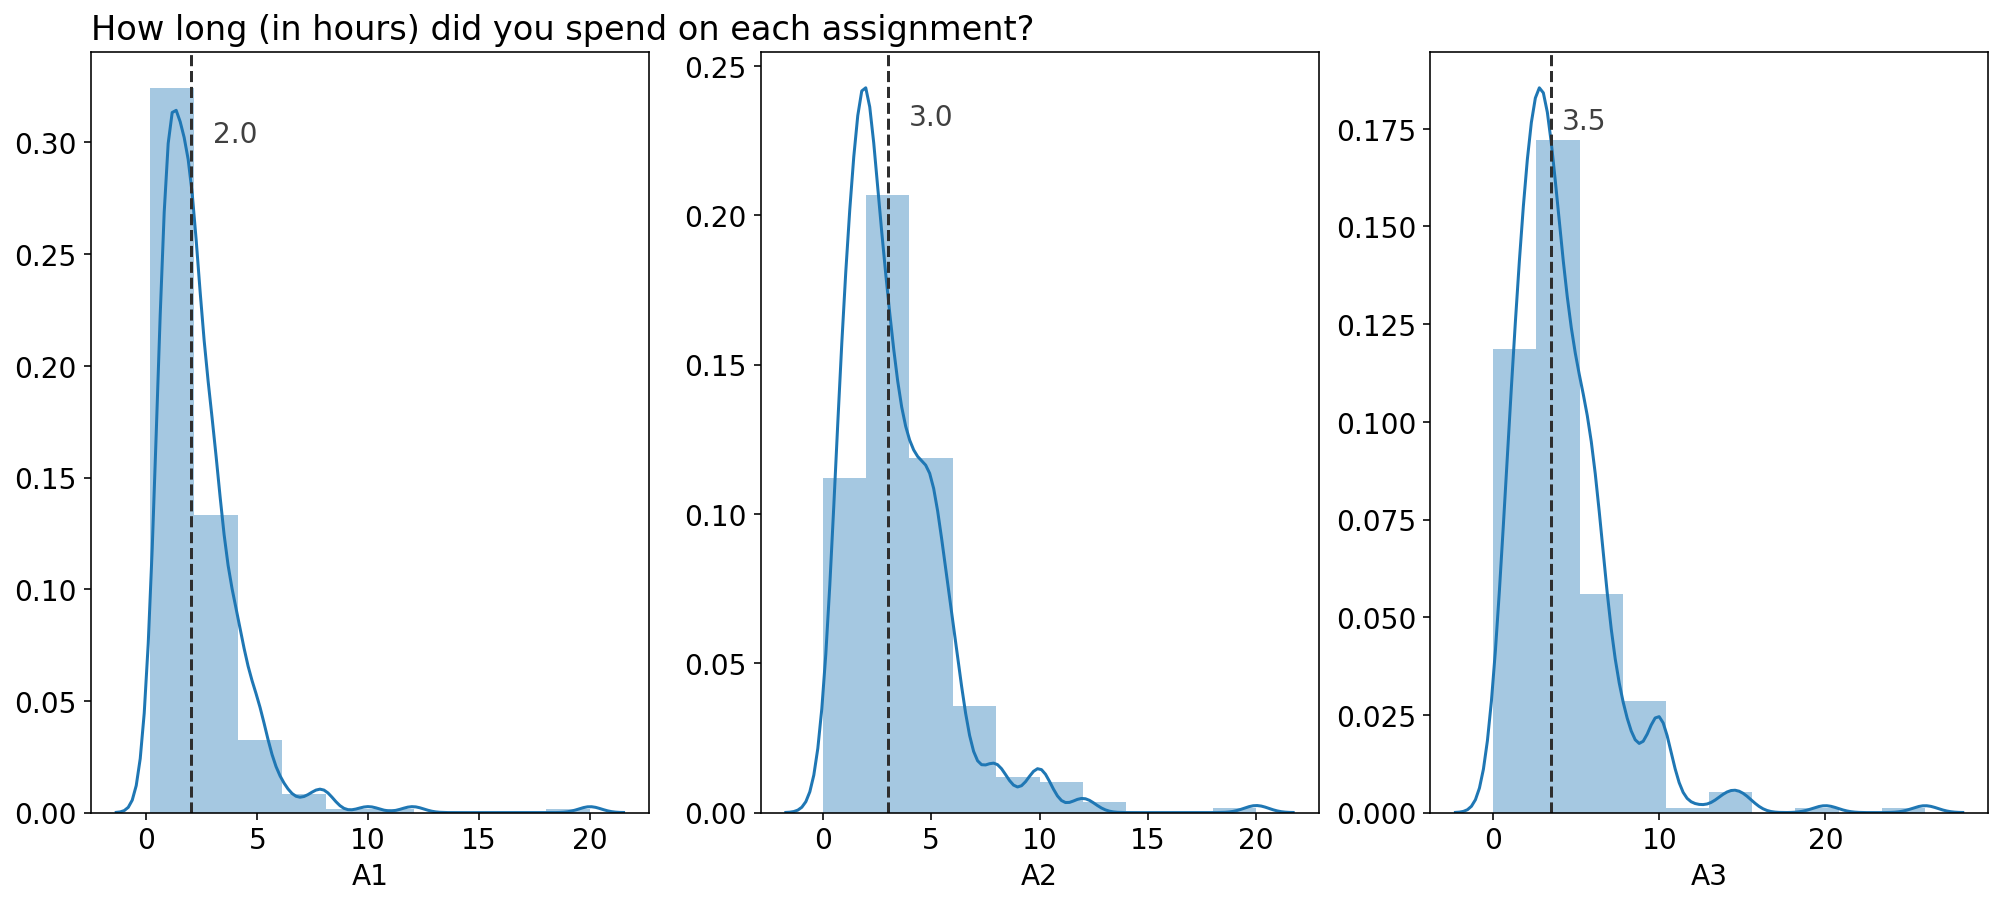

In [17]:
plt.subplot(1, 3, 1)
ax = sns.distplot(df_wi20['a1'], bins = 10)
ax.axvline(df_wi20['a1'].median(), color='#2e2e2e', linestyle='--')
plt.title('How long (in hours) did you spend on each assignment?', loc='left')
ax.text(x=df_wi20['a1'].median()+2, y=0.3, s=df_wi20['a1'].median(), fontsize=14, alpha=0.75, ha='center')
plt.xlabel('A1')

plt.subplot(1, 3, 2)
ax = sns.distplot(df_wi20['a2'], bins = 10)
ax.axvline(df_wi20['a2'].median(), color='#2e2e2e', linestyle='--')
ax.text(x=df_wi20['a2'].median()+2, y=0.23, s=df_wi20['a2'].median(), fontsize=14, alpha=0.75, ha='center')
plt.xlabel('A2')

plt.subplot(1, 3, 3)
ax = sns.distplot(df_wi20['a3'], bins = 10)
ax.axvline(df_wi20['a3'].median(), color='#2e2e2e', linestyle='--')
ax.text(x=df_wi20['a3'].median()+2, y=0.175, s=df_wi20['a3'].median(), fontsize=14, alpha=0.75, ha='center')
plt.xlabel('A3');

## Quick checks: Words of interest



In [18]:
def check_word_freq(df, word):
    """checks for frequenccy of word specified in most and least enjoyed responses"""
    
    most = df['enjoyed_most'].str.lower().str.contains(word).sum()/df['enjoyed_most'].notnull().sum()
    least = df['enjoyed_least'].str.lower().str.contains(word).sum()/df['enjoyed_least'].notnull().sum()
    
    out = pd.DataFrame({'most_freq': [most], 'least_freq': [least]})
    return out

#### Assignment

In [19]:
## check for assignment
check_word_freq(df_sp19, 'assignment')

,most_freq,least_freq
0,0.255208,0.117188


In [20]:
## check for assignment
check_word_freq(df_wi20, 'assignment')

,most_freq,least_freq
0,0.186441,0.176271


In [21]:
# can check helpfulness
df_sp19['helpful_materials'].str.lower().str.contains('assignments').sum()/df_sp19['helpful_materials'].notnull().sum()

0.8333333333333334

#### Group Project

In [22]:
## check for project in free text
check_word_freq(df_sp19, 'project')

,most_freq,least_freq
0,0.106771,0.192708


In [23]:
## check for project in free text
check_word_freq(df_wi20, 'project')

,most_freq,least_freq
0,0.118644,0.091525


In [24]:
## check for group in free text
check_word_freq(df_sp19, 'group')

,most_freq,least_freq
0,0.059896,0.195312


In [25]:
## check for group in free text
check_word_freq(df_wi20, 'group')

,most_freq,least_freq
0,0.037288,0.044068


## Sentiment Analysis

We get a quick snapshot of what's going on in COGS108, but we really want to understand the details. To do this, analyzing the sentiment of the text is a good next step.

#### Step 1: Tokenization

Tokenization is the first step in analyzing text. 

1. Aquire text of interest
2. Break text down (tokenize) into smaller chunks (i.e. words, bigrams, sentences, etc.)

A **token** is a single entity - think of it as a building block of language.

### Tokenization Example

Here we demonstrate what a tokenized single response looks like.

In [26]:
## import word tokenizer
from nltk.tokenize import word_tokenize

In [27]:
# just focus on this quarter's responses
df = df_wi20

In [28]:
tokenized_word = word_tokenize(df.loc[1,'enjoyed_most'])
print(tokenized_word)

['Guest', 'speakers', ',', 'they', 'were', 'very', 'interesting', 'and', 'I', 'learned', 'a', 'lot']


#### Tokenize COGS108 data

Using that concept we'll tokenize the words in the enjoyed_most and `enjoyed_least` columns for the data in our COGS108 data.

In [29]:
# tokenize most and least responses
df['most_token'] = df['enjoyed_most'].apply(word_tokenize) 
df['least_token'] = df['enjoyed_least'].apply(word_tokenize) 
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,a2,a3,most_token,least_token
0,Guest Lectures,No response,about as difficult,about the same,1.0,2.0,4.0,"[Guest, Lectures]","[No, response]"
1,"Guest speakers, they were very interesting and...",Nothing,somewhat easier,about the same,1.0,2.0,3.0,"[Guest, speakers, ,, they, were, very, interes...",[Nothing]
2,No response,No response,somewhat easier,somewhat less,3.0,3.0,4.0,"[No, response]","[No, response]"
3,No response,No response,somewhat easier,somewhat less,0.5,1.0,1.5,"[No, response]","[No, response]"
4,The discussion is clear and TA is nice.,Some grading for assignments requires regrade ...,way easier,way less,0.5,0.5,0.5,"[The, discussion, is, clear, and, TA, is, nice...","[Some, grading, for, assignments, requires, re..."


#### Step 2: Stop Words

**Stop words** are words that are of less interest to your analysis. 

For example, you wouldn't expect the following words to be important: is, am, are, this, a, an, the, etc.

By removing stopwords, you can lower the computational burden, focusing on only the words of interest.

To do so in `nltk`, you need to create a list of stopwords and filter them from your tokens.


In [30]:
# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words
print(stop_words)

{'then', "aren't", 'but', 'did', 'we', 'above', 'such', 'hasn', 'under', 'between', 'further', 'because', 'with', 'them', 'being', 'its', 'do', 'itself', 'ain', 'himself', 'out', 'i', 'me', 'on', "mightn't", "didn't", 'or', "she's", 'both', 'an', 'nor', "wasn't", 'don', 'll', "you've", 'a', 're', 'was', 'herself', 'and', 'these', 'y', 'off', "wouldn't", 'ma', 'having', 'shouldn', 'those', 'hadn', 'after', 'whom', 'him', 'd', "hasn't", "haven't", 'while', "mustn't", 'through', 'by', 'as', 'his', 'ourselves', 'down', 'before', "isn't", 'into', 'now', 'all', 'each', 'your', 'few', 'just', 'had', 'haven', 'over', 'wasn', 'her', 't', 'below', 'this', 'of', "doesn't", "weren't", 'most', 'during', 'should', 'other', 'to', 'no', 'not', 'you', 'doesn', 'against', 'more', 'yourself', 'they', 'does', 'same', "needn't", 'mustn', 'won', 'once', 'be', 'some', "you'd", 'aren', 'very', 'been', 'that', "hadn't", 'he', 'why', 'weren', 'were', 'what', 'ours', 's', 'which', 'will', 'only', 'our', 'for', "

### Stop Words Example

Here we compare a sentence after tokenization to one that has been tokenized _and had stop words removed_.

In [31]:
# example of removing stop words
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_word)
print("Filterd Sentence:", filtered_sent)

Tokenized Sentence: ['Guest', 'speakers', ',', 'they', 'were', 'very', 'interesting', 'and', 'I', 'learned', 'a', 'lot']
Filterd Sentence: ['Guest', 'speakers', ',', 'interesting', 'I', 'learned', 'lot']


#### Remove Stop Words: COGS108 data

Using that idea, we can go ahead and remove stop words from our tokenized most and least liked tokenized data.

In [32]:
# remove stop words
df['most_stop'] = df['most_token'].apply(lambda x: [item for item in x if item not in stop_words])
df['least_stop'] = df['least_token'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,a2,a3,most_token,least_token,most_stop,least_stop
0,Guest Lectures,No response,about as difficult,about the same,1.0,2.0,4.0,"[Guest, Lectures]","[No, response]","[Guest, Lectures]","[No, response]"
1,"Guest speakers, they were very interesting and...",Nothing,somewhat easier,about the same,1.0,2.0,3.0,"[Guest, speakers, ,, they, were, very, interes...",[Nothing],"[Guest, speakers, ,, interesting, I, learned, ...",[Nothing]
2,No response,No response,somewhat easier,somewhat less,3.0,3.0,4.0,"[No, response]","[No, response]","[No, response]","[No, response]"
3,No response,No response,somewhat easier,somewhat less,0.5,1.0,1.5,"[No, response]","[No, response]","[No, response]","[No, response]"
4,The discussion is clear and TA is nice.,Some grading for assignments requires regrade ...,way easier,way less,0.5,0.5,0.5,"[The, discussion, is, clear, and, TA, is, nice...","[Some, grading, for, assignments, requires, re...","[The, discussion, clear, TA, nice, .]","[Some, grading, assignments, requires, regrade..."


#### Step 3: Lexicon Normalization (**Stemming**)

In language, many different words come from the same root word. 

For example, "intersecton", "intersecting", "intersects", and "intersected" are all related to the common root word - "intersect".

**Stemming** is how linguistic normalization occurs - it reduces words to their root words (and chops off additional things like 'ing') - all of the above words would be reduced to their common stem "intersect."






### Stemming Example

After tokenization and removing stop words, we can get the stem for all tokens (words) in our dataset.

In [33]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:", filtered_sent)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['Guest', 'speakers', ',', 'interesting', 'I', 'learned', 'lot']
Stemmed Sentence: ['guest', 'speaker', ',', 'interest', 'I', 'learn', 'lot']


#### Stemming: COGS108 data

Here, we obtain the stem (root word) for all tokens in our dataset.

In [34]:
df['most_stem'] = df['most_stop'].apply(lambda x: [ps.stem(y) for y in x])
df['least_stem'] = df['least_stop'].apply(lambda x: [ps.stem(y) for y in x])
df.head()

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,a2,a3,most_token,least_token,most_stop,least_stop,most_stem,least_stem
0,Guest Lectures,No response,about as difficult,about the same,1.0,2.0,4.0,"[Guest, Lectures]","[No, response]","[Guest, Lectures]","[No, response]","[guest, lectur]","[No, respons]"
1,"Guest speakers, they were very interesting and...",Nothing,somewhat easier,about the same,1.0,2.0,3.0,"[Guest, speakers, ,, they, were, very, interes...",[Nothing],"[Guest, speakers, ,, interesting, I, learned, ...",[Nothing],"[guest, speaker, ,, interest, I, learn, lot]",[noth]
2,No response,No response,somewhat easier,somewhat less,3.0,3.0,4.0,"[No, response]","[No, response]","[No, response]","[No, response]","[No, respons]","[No, respons]"
3,No response,No response,somewhat easier,somewhat less,0.5,1.0,1.5,"[No, response]","[No, response]","[No, response]","[No, response]","[No, respons]","[No, respons]"
4,The discussion is clear and TA is nice.,Some grading for assignments requires regrade ...,way easier,way less,0.5,0.5,0.5,"[The, discussion, is, clear, and, TA, is, nice...","[Some, grading, for, assignments, requires, re...","[The, discussion, clear, TA, nice, .]","[Some, grading, assignments, requires, regrade...","[the, discuss, clear, TA, nice, .]","[some, grade, assign, requir, regrad, get, poi..."


#### Step 4: Frequency Distribution

It can be helpful to get a sense of which words are most frequent in our dataset.

In [35]:
# get series of all most and least liked words after stemming
# note that "No Response" is still being included in the analysis
most = df['most_stop'].apply(pd.Series).stack()
least = df['least_stem'].apply(pd.Series).stack()

`FreqDist` calculates the frequency of each word in the text and we can plot the most frequent words.

In [36]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_most = FreqDist(most)
fdist_least = FreqDist(least)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_most[punc]
    del fdist_least[punc]

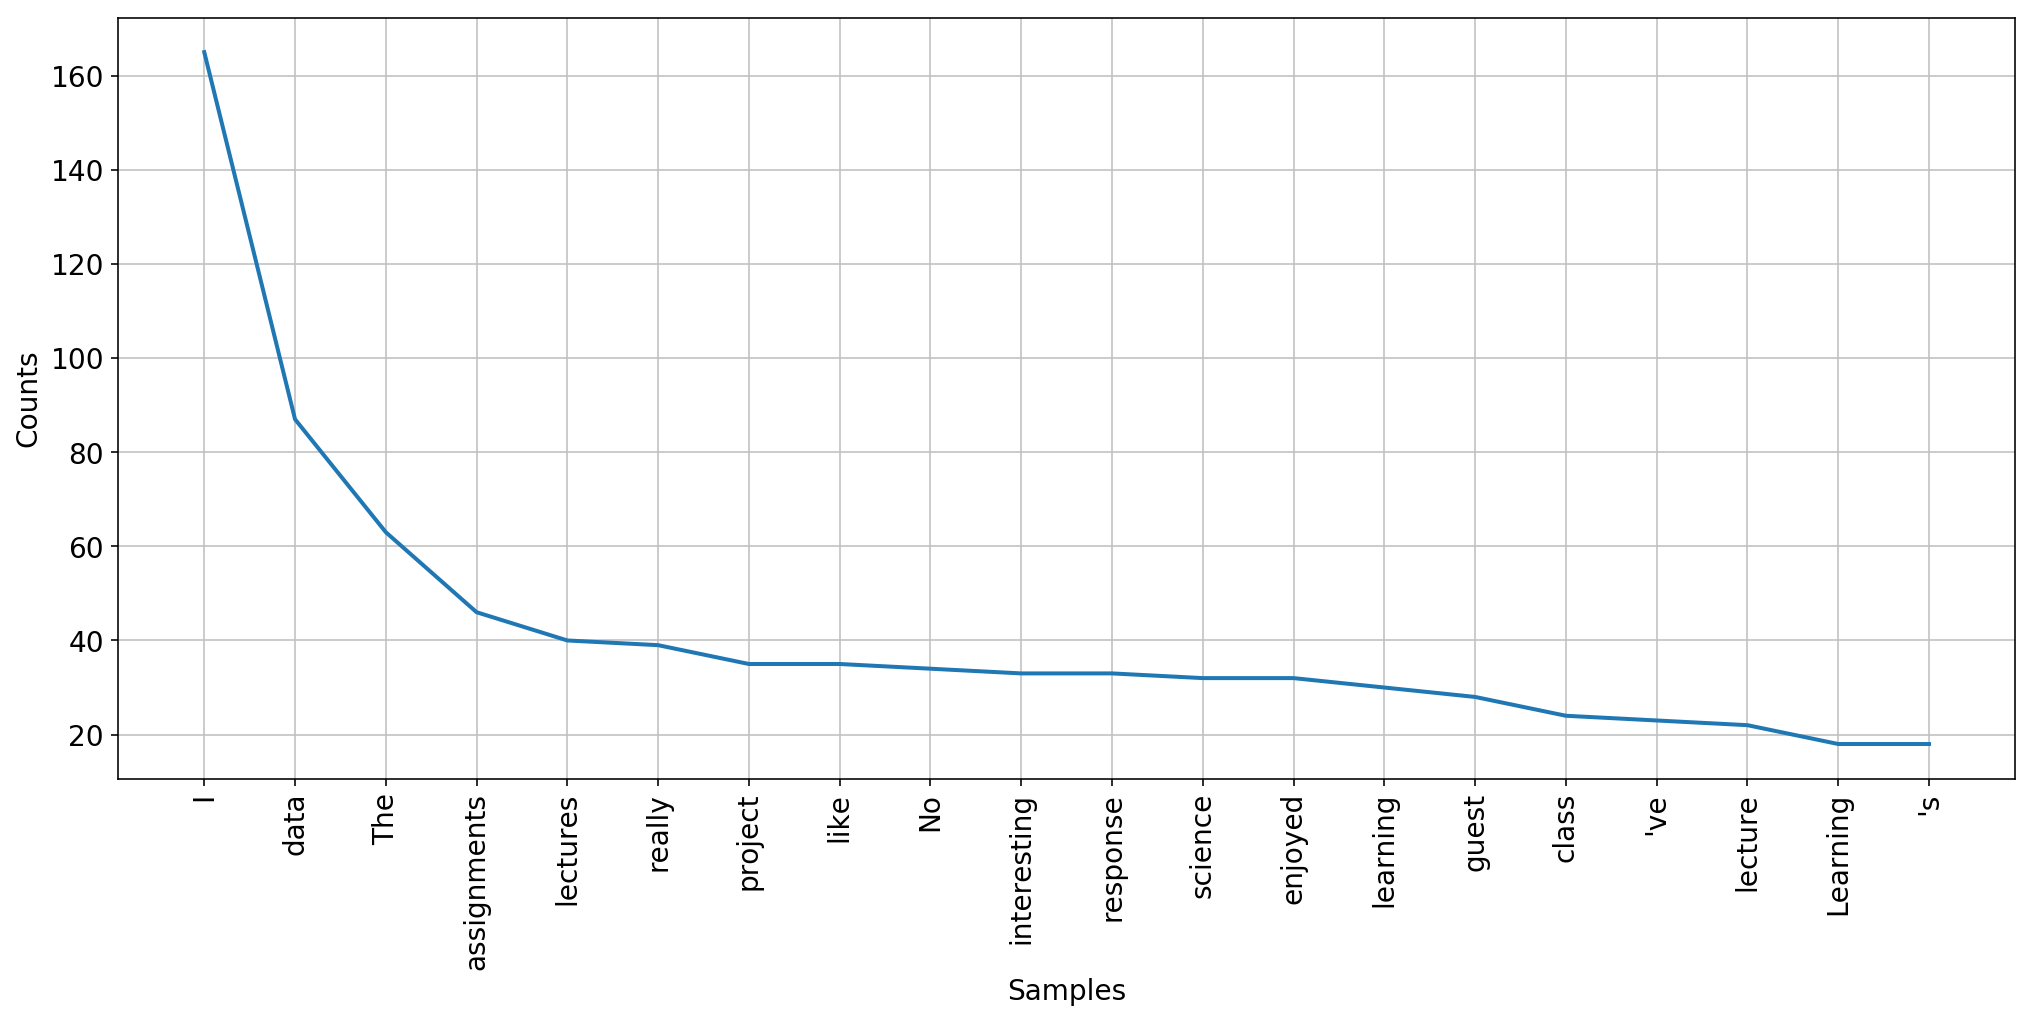

In [37]:
# Frequency Distribution Plot - top 20
# for words in what students like most
fdist_most.plot(20, cumulative=False)

# Clicker Question

Which word is least common in responses about **what students like most** about COGS108?

A) I  | B) assignments | C) use | D) lot | E) can't be determined from this

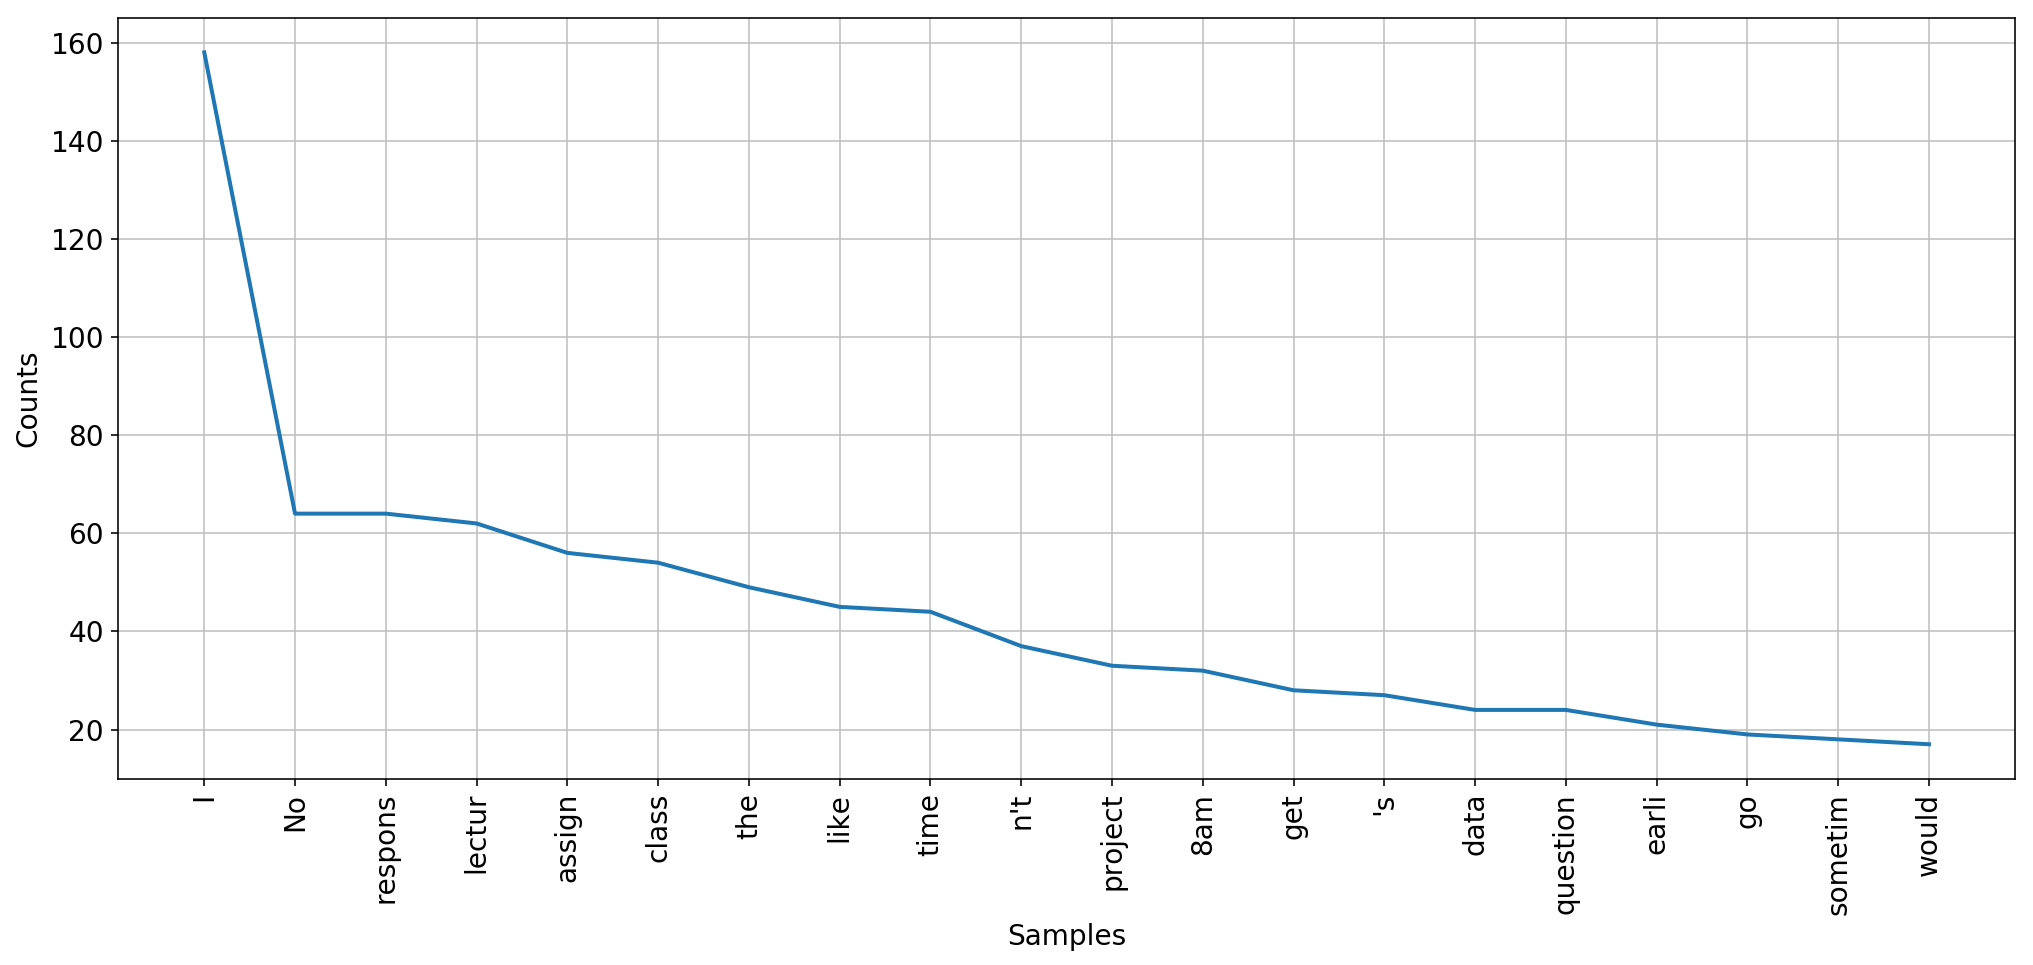

In [38]:
# Frequency Distribution Plot
# for what students like least
fdist_least.plot(20, cumulative=False)

#### Step 5: Sentiment Analysis!

**Sentiment Analysis** quantifies the content, idea, beliefs and opinions conveyed in text. 

Two general approaches:

1. **Lexicon-based** - count number of words in a text belonging to each sentiment (positive, negative, happy, angry, etc.)
2. **Machine learning-based** - develop a classification model on pre-labeled data



### Sentiment Example

To get a measure of overall sentiment in our text, we'll compare our text to the VADER lexicon.

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

VADER handles:

- capitalization (great vs GREAT) & punctuation (exclamation makes more positive!)
- emojis and emoticons
- degree modifiers (extremely good vs. marginally good)
- contractions and conjunctions (but signals shift)

In [40]:
analyser.polarity_scores("The class is super cool.")

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}

In [41]:
analyser.polarity_scores("The class is not super cool.")

{'neg': 0.561, 'neu': 0.439, 'pos': 0.0, 'compound': -0.6259}

In [42]:
analyser.polarity_scores("The class is NOT super cool!")

{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.6597}

`pos` + `neg` + `neu` = 1

**`compound`** score - metric that calculates sum of all the lexicon ratings and normalizes between -1(most extreme negative) and +1 (most extreme positive)
- positive: `compound` >= 0.05 
- neutral: -0.05 < `compound` < 0.05
- negative : `compound` <= -0.05

# Clicker Question

Given the sentence "I love bike riding through the city every day!", what would you expect its `compound` score to be? 
- A) -1
- B) -0.7
- C) 0
- D) 0.7
- E) 1

In [43]:
analyser.polarity_scores("I love bike riding through the city every day!")

{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.6696}

#### Sentiment Analysis: COGS108 data

Here, we will calculate the sentiment of each most liked and least liked student response from the survey.

In [44]:
# get list of the 'sentences' (responses) from each individual
most_list = list(df['enjoyed_most'].values)
least_list = list(df['enjoyed_least'].values)

In [45]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [46]:
# get sentiment measures
least_sentiments = get_sentiments(least_list)
most_sentiments = get_sentiments(most_list)

#### Sentiment Analysis: COGS108 data output

After calculating the sentiment of each response, we can look at the output of each.

In [47]:
# take a look at the output
least_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,-0.2960,0.688,0.312,0.000,No response
1,0.0000,0.000,1.000,0.000,Nothing
2,-0.2960,0.688,0.312,0.000,No response
3,-0.2960,0.688,0.312,0.000,No response
4,0.0000,0.000,1.000,0.000,Some grading for assignments requires regrade ...
5,0.0000,0.000,1.000,0.000,Not much programming direction
6,0.0000,0.000,1.000,0.000,guest lectures
7,0.1027,0.192,0.583,0.225,Programming assignments lack some clarity espe...
8,0.0000,0.000,1.000,0.000,"The class is too early, sometimes it's tiring ..."
9,0.7713,0.096,0.570,0.334,The project proposal grading was honestly pret...


In [48]:
# take a look at the output
most_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,0.0000,0.000,1.000,0.000,Guest Lectures
1,0.4576,0.000,0.728,0.272,"Guest speakers, they were very interesting and..."
2,-0.2960,0.688,0.312,0.000,No response
3,-0.2960,0.688,0.312,0.000,No response
4,0.6597,0.000,0.526,0.474,The discussion is clear and TA is nice.
5,0.0000,0.000,1.000,0.000,Group collaboration
6,0.0000,0.000,1.000,0.000,project
7,0.6249,0.000,0.370,0.630,Lectures are interesting and engaging.
8,0.7650,0.000,0.612,0.388,Learned a substantial amount of the conceptual...
9,0.8271,0.000,0.479,0.521,The python is pretty nice and data science par...


#### Let's deal with those `No response` values

We've left them in there long enough. Let's remove the 'No response' values before we look at any overall patterns.

In [49]:
most_sentiments = most_sentiments[most_sentiments['sentence'] != 'No response']
least_sentiments = least_sentiments[least_sentiments['sentence'] != 'No response']

#### Sentiment Analysis: COGS108 data - `describe`

To get an overall sense of the values stored in each of these dataframes, we can use `describe`.

In [50]:
most_sentiments.describe()

,compound,neg,neu,pos
count,262.000000,262.000000,262.000000,262.000000
mean,0.363463,0.012496,0.805454,0.182042
std,0.343502,0.062561,0.194862,0.190456
min,-0.670500,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.683000,0.000000
50%,0.421500,0.000000,0.823000,0.159000
75%,0.659525,0.000000,1.000000,0.285750
max,0.979700,0.688000,1.000000,1.000000


In [51]:
least_sentiments.describe()

,compound,neg,neu,pos
count,231.000000,231.000000,231.000000,231.000000
mean,-0.011144,0.083996,0.856160,0.055519
std,0.358700,0.121452,0.161305,0.098883
min,-0.900700,0.000000,0.000000,0.000000
25%,-0.250000,0.000000,0.764500,0.000000
50%,0.000000,0.000000,0.887000,0.000000
75%,0.000000,0.131000,1.000000,0.098000
max,0.931300,0.592000,1.000000,0.457000


#### Sentiment Analysis: COGS108 data - plotting

We can compare the distribution of the `compound` metric between the two analyses.

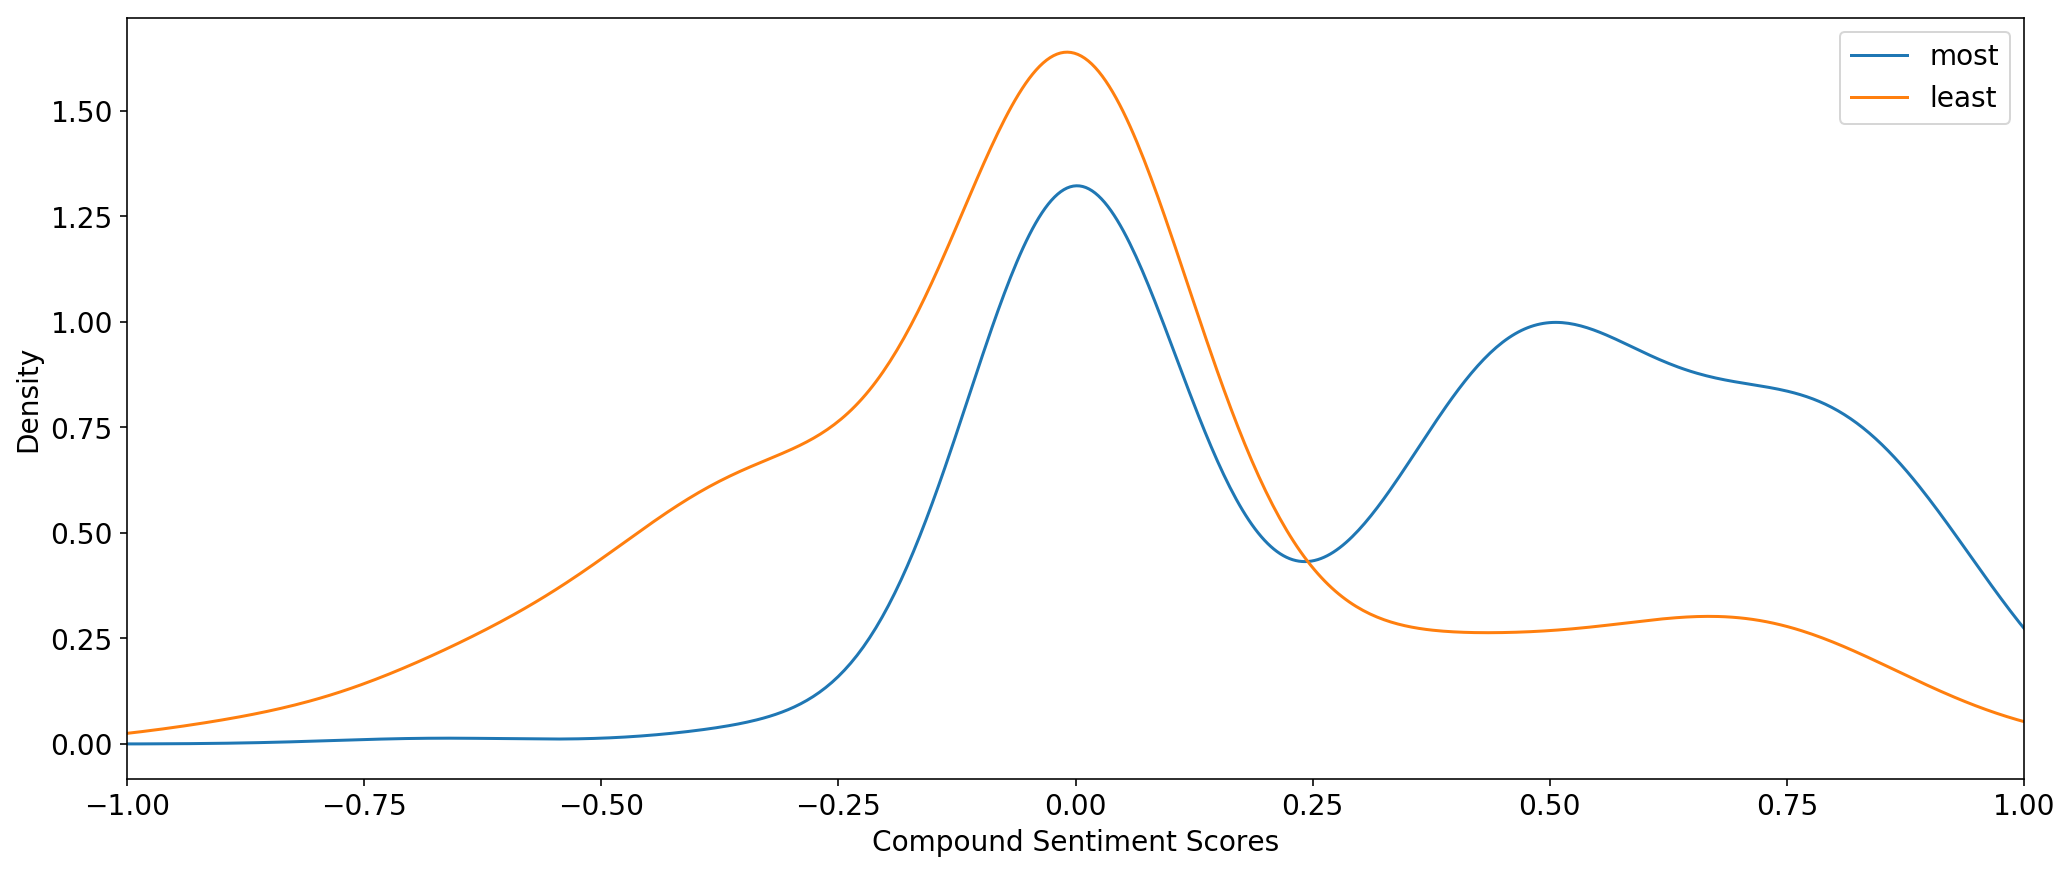

In [52]:
most_sentiments['compound'].plot.density(label='most')
least_sentiments['compound'].plot.density(label='least')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

In [53]:
# include label for boxplot
most_sentiments['which'] = 'most'
least_sentiments['which'] = 'least'
# concatenate data frames together
compound_out = pd.concat([most_sentiments, least_sentiments])
compound_out.head()

,compound,neg,neu,pos,sentence,which
0,0.0000,0.0,1.000,0.000,Guest Lectures,most
1,0.4576,0.0,0.728,0.272,"Guest speakers, they were very interesting and...",most
4,0.6597,0.0,0.526,0.474,The discussion is clear and TA is nice.,most
5,0.0000,0.0,1.000,0.000,Group collaboration,most
6,0.0000,0.0,1.000,0.000,project,most


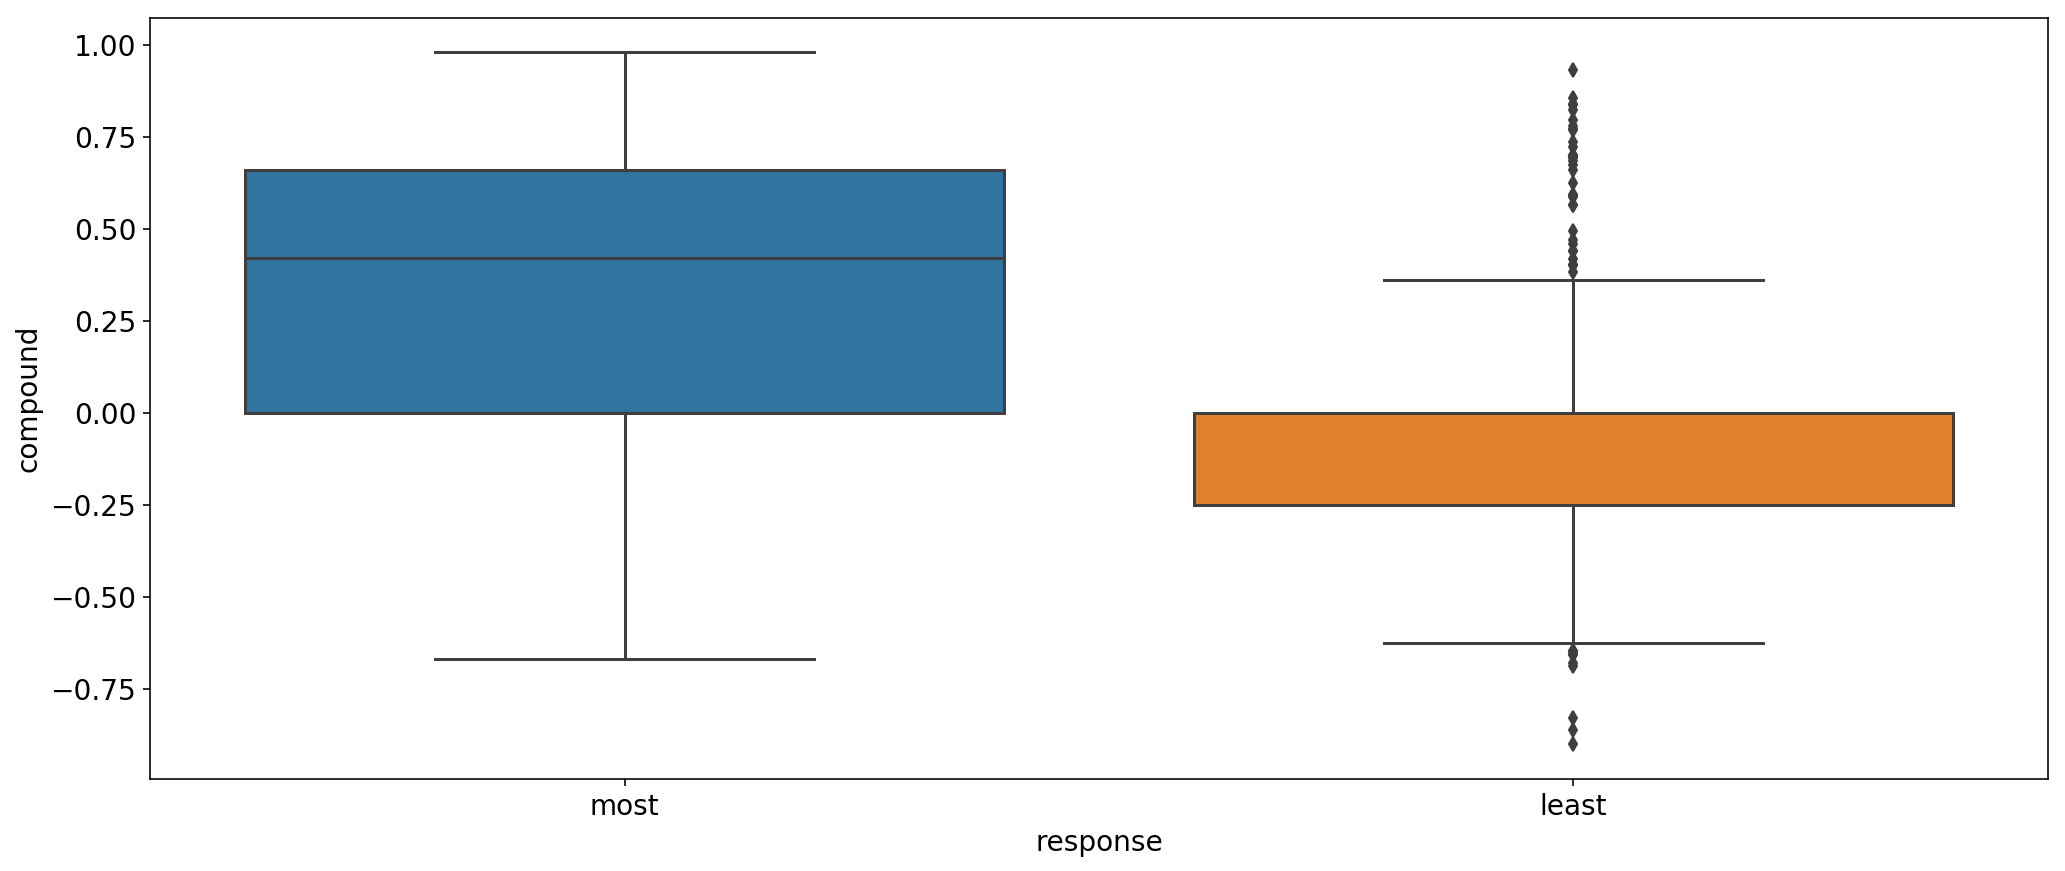

In [54]:
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='compound')
plt.xlabel('response');

Probably unsurprisingly, the overall sentiment of what students like tends to be more positive than what students like less. 

Probably not surprising given the data and question on the survey. But, let's dig deeper into these data moving beyond sentiment analysis...

## TF-IDF

Term Frequency - Inverse Document Frequency (**TF-IDF**) sets out to identify the tokens most unique to your document of interest (relative to all documents in your corpus). 

**Term Frequency (TF)** - counts the number of words (tokens) occurring in each document.

**Inverse Document Frequency (IDF)** - weights the word by their relative frequency across documents. 

$$IDF_{word} = log(\frac{\# documents}{\# \ documents\_containing\_word})$$

$$TF-IDF = TF \times IDF$$

words with a high TF-IDF are those with high frequency in one document & relatively low frequency in other documents

For our purposes, our **corpus** will be students' responses to what they like most and least about COGS108.

We'll treat this as **two separate documents**:
1. What students like most
2. What students like least

# Clicker Question

**Hypothesis Generation**

What do you think is the word most unique to the question "What have you enjoyed MOST about COGS108 so far?" 

- A) enjoyed
- B) assignments
- C) group
- D) response
- E) early

# Clicker Question

**Hypothesis Generation**


What do you think is the word most unique to the question "What have you enjoyed LEAST about COGS108 so far?" 

- A) enjoyed
- B) assignments
- C) group
- D) response
- E) early

### Bag of Words (BoW) approach

Converts the text into a co-occurrence matrix across documents within the corpus.

To do this, let's get our text ready.

We're going to make sure all our words are lower case, remove punctuation from each, and then provide the text (`corpus`) to `TfidfVectorizer`.

In [55]:
import string 

# lowercase text
least = list(map(str.lower, least_list))
most = list(map(str.lower, most_list))

# remove punctuation
for c in string.punctuation:
    least = str(least).replace(c, "")
    most = str(most).replace(c, "")

# get list of two documents together
corpus = [str(least), str(most)]

### Calculate TF-IDF

With our text ready for analysis, it's time to calculate TF-IDF

To start our TF-IDF analysis, we'll first **create a `TfidfVectorizer` object to transform our text data into vectors.**

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

#### TF-IDF: COGS108 data - calculation

Here, we use our vectorizer to calculate TF-IDF across the words in our word matrix.

In [58]:
# calculate TF-IDF
cogs_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
cogs_tfidf.columns = tfidf.get_feature_names()
cogs_tfidf = cogs_tfidf.rename(index={0:'least', 1:'most'})

#### TF-IDF: COGS108 data - output

If we just want to look at the word most uniuqe in each document...

In [59]:
most_unique = cogs_tfidf.idxmax(axis=1) 
most_unique

least      early
most     enjoyed
dtype: object

Alternatively, we can sort by the set or words most unique to each document:

In [60]:
cogs_tfidf.sort_values(by='most', axis=1, ascending=False)

,enjoyed,data,able,working,assignments,learning,lectures,really,practical,project,...,learningreviewing,line,least,lecture21820,lengthy,lenient,less,08,limitations,levels
least,0.000000,0.075866,0.000000,0.000000,0.086872,0.018158,0.079302,0.067331,0.000000,0.079918,...,0.025521,0.025521,0.071248,0.025521,0.025521,0.025521,0.053558,0.025521,0.025521,0.025521
most,0.114817,0.100812,0.095337,0.091657,0.090220,0.089111,0.087930,0.085312,0.084912,0.084837,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
cogs_tfidf.sort_values(by='least', axis=1, ascending=False)

,early,response,class,assignments,wish,like,8,time,8am,project,...,practicing,practical,powerful,power,postgraduation,difference,dig,digest,discuss,zip
least,0.103219,0.093676,0.087679,0.086872,0.086717,0.084682,0.084284,0.083228,0.080513,0.079918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
most,0.000000,0.082256,0.075652,0.090220,0.000000,0.083333,0.000000,0.018293,0.030973,0.084837,...,0.025711,0.084912,0.025711,0.025711,0.025711,0.025711,0.025711,0.025711,0.025711,0.025711


**Sentiment Analysis** and **TF-IDF** are really helpful when analyzing documents and corpuses of text.

But, what if, from the text itself we wanted to predict whether or not the text was likely a 'most' liked or a 'least' liked comment? We'll discuss how to do this in the coming **machine learning** lectures!